<a href="https://colab.research.google.com/github/peytonrunyan/DS-Sprint-02-Storytelling-With-Data/blob/master/LS_DS_124_Sequence_your_narrative_LESSON_SOLUTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv

Variables : visual
- Income : x
- Lifespan : y
- population : size of dot
- year :  animation frame (alt: small multiples) 
- country : annotation
- region : color

qualitative
- editorial/contextual explanation: audio narration (alt:txt)

## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [2]:
!pip install --upgrade seaborn

    100% |████████████████████████████████| 215kB 6.6MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [1]:
import seaborn as sns
sns.__version__

'0.9.0'

## More imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load & look at data

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [6]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((44268, 3), (44370, 3), (51939, 3), (273, 33), (590, 16))

In [7]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,abw,1800,833
1,abw,1801,833
2,abw,1802,833
3,abw,1803,833
4,abw,1804,833


In [9]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [10]:
population.head()

,geo,time,population_total
0,abw,1800,19286
1,abw,1801,19286
2,abw,1802,19286
3,abw,1803,19286
4,abw,1804,19286


In [12]:
pd.options.display.max_columns = None
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [13]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,http://www.gapminder.org/gapminder-world/docum...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,http://spreadsheets.google.com/pub?key=t4eF8H_...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,http://ilo.org/legacy/english/global-reports/k...,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,http://ilo.org/legacy/english/global-reports/k...,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,http://ilo.org/legacy/english/global-reports/k...,labour_force_participation


## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [0]:
#help(pd.merge)


In [15]:
df = pd.merge(income, lifespan)
income.shape, lifespand.shape, df.shape

((44268, 3), (44370, 3), (41790, 4))

In [16]:
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,abw,1800,833,34.42
1,abw,1801,833,34.42
2,abw,1802,833,34.42
3,abw,1803,833,34.42
4,abw,1804,833,34.42


In [19]:
entities[entities['country'] == 'abw'] # use .T to take the display from horizontal to vertical 

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.5,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america


In [20]:
entities.world_6region.value_counts()

europe_central_asia         77
sub_saharan_africa          53
america                     53
east_asia_pacific           46
middle_east_north_africa    23
south_asia                   8
Name: world_6region, dtype: int64

In [22]:
variables = ['country','name', 'world_6region']
entities[variables].head()

,country,name,world_6region
0,abkh,Abkhazia,europe_central_asia
1,abw,Aruba,america
2,afg,Afghanistan,south_asia
3,ago,Angola,sub_saharan_africa
4,aia,Anguilla,america


In [24]:
df.head()


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,abw,1800,833,34.42
1,abw,1801,833,34.42
2,abw,1802,833,34.42
3,abw,1803,833,34.42
4,abw,1804,833,34.42


In [0]:
pd.merge(df, entities[variables],
         how='inner', left_on='geo', right_on='country')

In [26]:
df = pd.merge(df, population)
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,abw,1800,833,34.42,19286
1,abw,1801,833,34.42,19286
2,abw,1802,833,34.42,19286
3,abw,1803,833,34.42,19286
4,abw,1804,833,34.42,19286


In [0]:

df = pd.merge(df, entities[variables],
         how='inner', left_on='geo', right_on='country')
#drop columns not needed
df.drop(columns=['geo','country'], inplace=True)

In [0]:
df = df.rename(columns={'time':'year', 'income_per_person_gdppercapita_ppp_inflation_adjusted' : 'income', 'life_expectancy_years': 'lifespan', 'population_total': 'population'})

## Explore data

In [41]:
df.head()

,year,income,lifespan,population,name,world_6region
0,1800,833,34.42,19286,Aruba,america
1,1801,833,34.42,19286,Aruba,america
2,1802,833,34.42,19286,Aruba,america
3,1803,833,34.42,19286,Aruba,america
4,1804,833,34.42,19286,Aruba,america


In [38]:
df.shape


(41790, 6)

In [45]:
df.describe()

,year,income,lifespan,population
count,41790.000000,41790.000000,41790.000000,4.179000e+04
mean,1909.357406,4778.593683,43.267181,1.332550e+07
std,63.322969,10502.602580,16.394240,6.502349e+07
min,1800.000000,247.000000,1.000000,2.128000e+03
25%,1854.000000,884.000000,31.200000,3.760282e+05
50%,1909.000000,1449.000000,35.500000,1.915244e+06
75%,1964.000000,3536.750000,56.340000,6.260147e+06
max,2018.000000,177522.000000,84.170000,1.415046e+09


In [0]:
usa = df[df.name == 'United States']

In [48]:
usa[usa.year.isin([1818, 1918, 2018])]

,year,income,lifespan,population,name,world_6region
39399,1818,2258,39.41,9879049,United States,america
39499,1918,9371,47.18,106721812,United States,america
39599,2018,54898,79.14,326766748,United States,america


In [0]:
df = df.rename(columns={'world_6region': 'region'})

In [53]:
now = df[df.year.isin([2018])]
now.head()

,year,income,lifespan,population,name,region
218,2018,39219,76.14,105670,Aruba,america
437,2018,1867,58.69,36373176,Afghanistan,south_asia
656,2018,5846,65.19,30774205,Angola,sub_saharan_africa
875,2018,12424,78.01,2934363,Albania,europe_central_asia
1141,2018,68231,76.89,9541615,United Arab Emirates,middle_east_north_africa


## Plot visualization

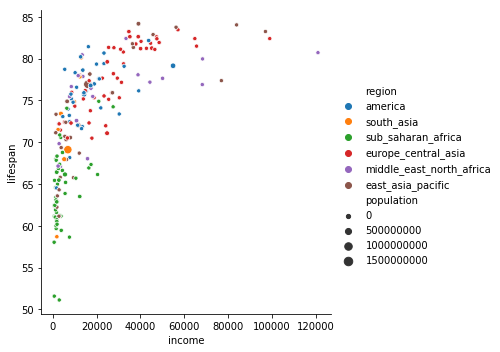

In [54]:
esns.relplot(x='income', y='lifespan', hue='region', size='population', data=now)

In [55]:
now[now['income'] > 80000]

,year,income,lifespan,population,name,region
22910,2018,99034,82.39,590321,Luxembourg,europe_central_asia
23348,2018,97057,83.24,632418,"Macao, China",east_asia_pacific
31498,2018,121033,80.71,2694849,Qatar,middle_east_north_africa
33031,2018,83888,84.03,5791901,Singapore,east_asia_pacific


In [0]:
qatar=now[now['name']=='Qatar']

In [0]:
qatar_income= qatar.income.values[0]
qatar_lifespan= qatar.lifespan.values[0]

In [0]:
years = [1818, 1918, 2018]
centuries = df[df.year.isin(years)]

In [0]:
sns.relplot?

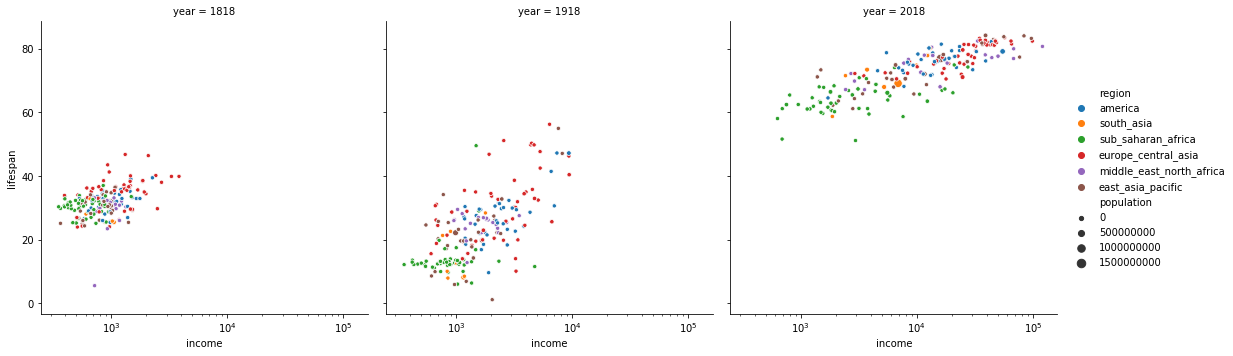

In [72]:
sns.relplot(x='income', y='lifespan', hue='region', size='population', data=centuries, col= 'year')

plt.xscale('log');

In [73]:
centuries.groupby('year').name.count()

year
1818    190
1918    190
2018    188
Name: name, dtype: int64

In [74]:
df.shape

(41790, 6)

In [75]:
df.head()

,year,income,lifespan,population,name,region
0,1800,833,34.42,19286,Aruba,america
1,1801,833,34.42,19286,Aruba,america
2,1802,833,34.42,19286,Aruba,america
3,1803,833,34.42,19286,Aruba,america
4,1804,833,34.42,19286,Aruba,america


In [0]:
df= df.rename(columns={'name':'country'})

In [80]:
america = df[df['region'] == 'america']

NameError: ignored

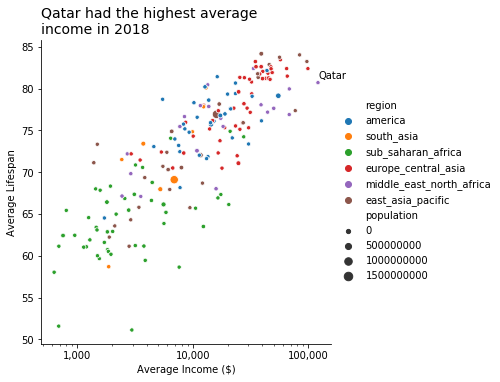

In [162]:
sizepop = now.population
ax = sns.relplot(x='income', y='lifespan', hue='region',size=sizepop, data=now)
plt.text(x=qatar_income+200, y=qatar_lifespan+.5, s='Qatar')
plt.xscale('log')
plt.title('Qatar had the highest average \nincome in 2018', fontsize=14, loc='left')
ax.set_xticklabels(['placeholder1','placeholder2','1,000','10,000','100,000'])
plt.xlabel('Average Income ($)')
plt.ylabel('Average Lifespan');
#ax.set(xticklabels=[]);

In [0]:
americas = df[df['region'] == 'america']

In [0]:
americas1 = americas[americas['year'] == 2018]

In [170]:
eamericas1.shape

(35, 6)

In [209]:
m_income = df.groupby('region').income.mean()
m_life= df.groupby('region').lifespan.mean()
print(m_income)
print(m_life)
m_life['america']

region
america                     4932.975770
east_asia_pacific           4740.708881
europe_central_asia         7094.231553
middle_east_north_africa    7957.939041
south_asia                  1455.739726
sub_saharan_africa          1495.621100
Name: income, dtype: float64
region
america                     45.211714
east_asia_pacific           42.247889
europe_central_asia         48.831910
middle_east_north_africa    41.693945
south_asia                  37.919886
sub_saharan_africa          38.180522
Name: lifespan, dtype: float64


45.21171413842002

AttributeError: ignored

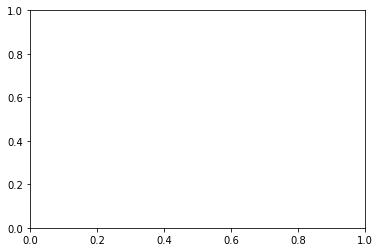

In [216]:
#ax = plt.scatter(x=a, y=b)
ab = [m_income.index]
ax = plt.scatter(x=m_income, y=m_life, c=m_income.index) #hue='region',size=sizepop, data=now


In [211]:
m_income.index

Index(['america', 'east_asia_pacific', 'europe_central_asia',
       'middle_east_north_africa', 'south_asia', 'sub_saharan_africa'],
      dtype='object', name='region')

[Index(['america', 'east_asia_pacific', 'europe_central_asia',
        'middle_east_north_africa', 'south_asia', 'sub_saharan_africa'],
       dtype='object', name='region')]